<a href="https://colab.research.google.com/github/mariam-ms/-GRIP-TASK-TWO/blob/main/GRIP_TASK_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#The Sparks Foundation

>  TASK I : "Predication Using Unsupervised ML" <br>
> Name: Mariam Elsehrawy


---



---



---



In [1]:
#import the essential libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
print("DONE!")

DONE!


In [4]:
#import my dataset
dataset=pd.read_csv("/content/Iris.csv")
print("DONE!\nYour data is imported successfully")

DONE!
Your data is imported successfully


In [19]:
# Print the first 5 rows of DataFrame.
dataset.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [28]:
#to know more about the data
dataset.describe

<bound method NDFrame.describe of       Id  SepalLengthCm  ...  PetalWidthCm         Species
0      1            5.1  ...           0.2     Iris-setosa
1      2            4.9  ...           0.2     Iris-setosa
2      3            4.7  ...           0.2     Iris-setosa
3      4            4.6  ...           0.2     Iris-setosa
4      5            5.0  ...           0.2     Iris-setosa
..   ...            ...  ...           ...             ...
145  146            6.7  ...           2.3  Iris-virginica
146  147            6.3  ...           1.9  Iris-virginica
147  148            6.5  ...           2.0  Iris-virginica
148  149            6.2  ...           2.3  Iris-virginica
149  150            5.9  ...           1.8  Iris-virginica

[150 rows x 6 columns]>

In [7]:
#pre-modeling step, check for null values
dataset.isnull().values.any()

False

Text(0, 0.5, 'PetalLengthCm')

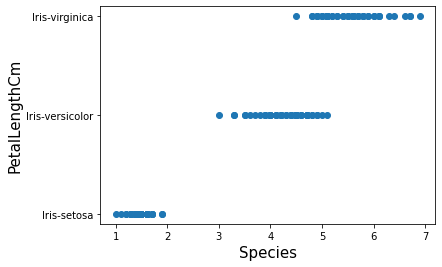

In [34]:
#visualize the data [SCATTER PLOT] this may help us in picking the k 
plt.scatter(dataset['PetalLengthCm'],dataset['Species']) 
plt.xlabel("Species",fontsize=15)
plt.ylabel('PetalLengthCm',fontsize=15)


Text(0, 0.5, 'PetalLengthCm')

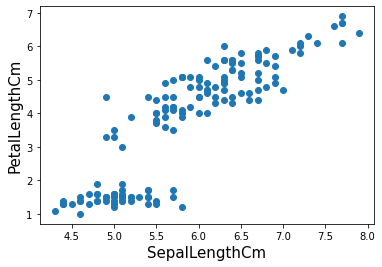

In [16]:
#visualize the data [SCATTER PLOT] 
plt.scatter(dataset['SepalLengthCm'],dataset['PetalLengthCm']) 
plt.xlabel("SepalLengthCm",fontsize=15)
plt.ylabel('PetalLengthCm',fontsize=15)


In [15]:
x = dataset.iloc[:, [0, 1, 2, 3]].values


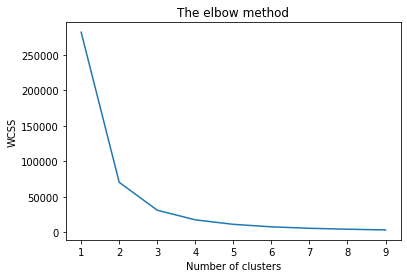

In [30]:
#optimum number of clusters for k-means classification

wcss = [] # NOTE THAT : WCSS is the sum of squared distance between each point and the centroid in a cluster
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_) #Inertia: It is the sum of squared distances of samples to their closest cluster center.
    
# Plotting the results onto a line graph, 
#'The elbow'
plt.plot(range(1, 10), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

In [21]:
# Applying kmeans to the dataset / Creating the kmeans classifier
#the k at the “elbow” that I chose is the point after which the inertia start decreasing in "a linear fashion"

kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

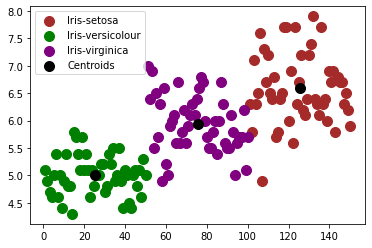

In [27]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'brown', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'green', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'purple', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'black', label = 'Centroids')

plt.legend()